In [57]:
from pathlib import Path


import tensorflow
import scipy
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os


In [58]:
AUDIO_DATA = Path('D:\Data\Music classification data')
genre_types = os.listdir(AUDIO_DATA)

In [59]:
genre_dict = {}

for genre in genre_types:
    audio_dir = AUDIO_DATA / genre
    audio_files = os.listdir(audio_dir)
    genre_dict[genre] = [audio_dir / x for x in audio_files]

In [60]:
AUDIO_FILE = genre_dict['blues'][0]

In [61]:
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

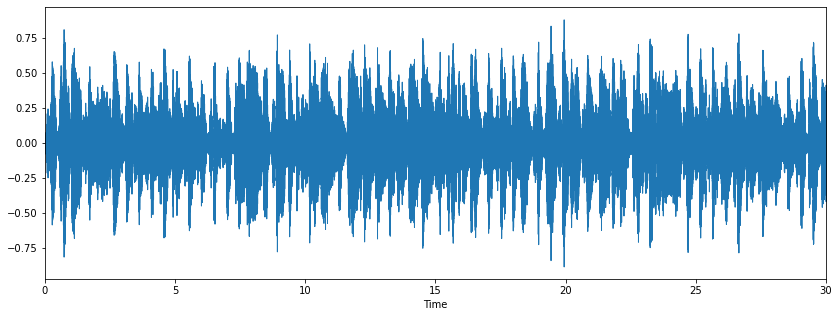

In [62]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

# Create sample spectogram

D:\Python\Anaconda\envs\expenses-tracker-env\lib\site-packages\librosa\display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


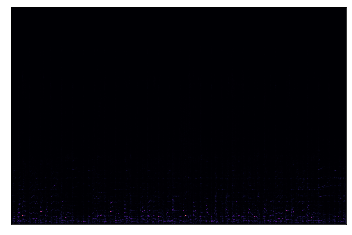

In [63]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

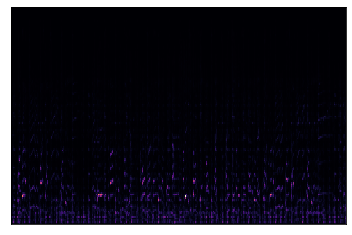

In [64]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

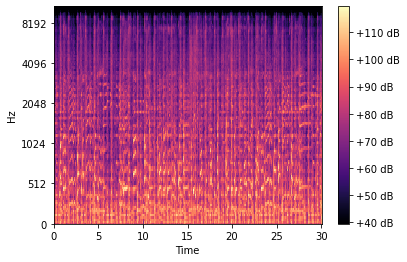

In [65]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')